In [1]:
from matplotlib import rc, font_manager as fm

# 나눔고딕 폰트 경로 설정
font_location = 'data/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()

# 폰트 설정
rc('font', family=font_name)

# 피처 엔지니어링 !

In [2]:
!pip install lightgbm==3.3.2
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [3]:
import lightgbm
lightgbm.__version__

'3.3.2'

In [4]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [5]:
temp_df = pd.read_csv('data/인코딩_완료_230914.csv')

# "상권_분류_코드_명"이 "골목상권"인 행만 추출
split_df1 = temp_df[temp_df['상권_구분_코드_명'] == '골목상권']

# 추출한 데이터프레임을 저장 (예시: CSV 파일로 저장)
split_df1.to_csv('골목상권_데이터230914.csv', index=False, encoding = 'utf-8 sig')

In [6]:
# "상권_분류_코드_명"이 "골목상권"인 행만 추출
split_df2 = temp_df[temp_df['상권_구분_코드_명'] != '골목상권']
split_df2 = split_df2.drop(["배후지_아파트_단지_수", 
                    "배후지_아파트_가격_1_억_미만_세대_수", 
                    "배후지_아파트_가격_1_억_세대_수", 
                    "배후지_아파트_가격_2_억_세대_수", 
                    "배후지_아파트_가격_3_억_세대_수", 
                    "배후지_아파트_가격_4_억_세대_수", 
                    "배후지_아파트_가격_5_억_세대_수", 
                    "배후지_아파트_가격_6_억_이상_세대_수"], axis=1)
# 추출한 데이터프레임을 저장 (예시: CSV 파일로 저장)
split_df2.to_csv('!=골목상권_데이터230914.csv', index=False, encoding = 'utf-8 sig')

## 코드(=잠정 확정) 사용

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 151819	training's l2: 2.30489e+10	valid_1's rmse: 139936	valid_1's l2: 1.95821e+10
[2]	training's rmse: 147280	training's l2: 2.16915e+10	valid_1's rmse: 135819	valid_1's l2: 1.84469e+10
[3]	training's rmse: 142948	training's l2: 2.04342e+10	valid_1's rmse: 131917	valid_1's l2: 1.74022e+10
[4]	training's rmse: 138900	training's l2: 1.92932e+10	valid_1's rmse: 128328	valid_1's l2: 1.64681e+10
[5]	training's rmse: 135019	training's l2: 1.82301e+10	valid_1's rmse: 124946	valid_1's l2: 1.56116e+10
[6]	training's rmse: 131330	training's l2: 1.72475e+10	valid_1's rmse: 121736	valid_1's l2: 1.48196e+10
[7]	training's rmse: 127838	training's l2: 1.63427e+10	valid_1's rmse: 118573	valid_1's l2: 1.40595e+10
[8]	training's rmse: 124481	training's l2: 1.54956e+10	valid_1's rmse: 115710

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 141890	training's l2: 2.01328e+10	valid_1's rmse: 174312	valid_1's l2: 3.03845e+10
[2]	training's rmse: 136816	training's l2: 1.87185e+10	valid_1's rmse: 168824	valid_1's l2: 2.85015e+10
[3]	training's rmse: 131997	training's l2: 1.74233e+10	valid_1's rmse: 163540	valid_1's l2: 2.67453e+10
[4]	training's rmse: 127484	training's l2: 1.62521e+10	valid_1's rmse: 158537	valid_1's l2: 2.51341e+10
[5]	training's rmse: 123202	training's l2: 1.51787e+10	valid_1's rmse: 153840	valid_1's l2: 2.36667e+10
[6]	training's rmse: 118965	training's l2: 1.41526e+10	valid_1's rmse: 149482	valid_1's l2: 2.23449e+10
[7]	training's rmse: 114994	training's l2: 1.32237e+10	valid_1's rmse: 145379	valid_1's l2: 2.11351e+10
[8]	training's rmse: 111195	training's l2: 1.23644e+10	valid_1's rmse: 141533

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146703	training's l2: 2.15218e+10	valid_1's rmse: 161107	valid_1's l2: 2.59556e+10
[2]	training's rmse: 142491	training's l2: 2.03036e+10	valid_1's rmse: 156978	valid_1's l2: 2.4642e+10
[3]	training's rmse: 138493	training's l2: 1.91802e+10	valid_1's rmse: 153092	valid_1's l2: 2.34371e+10
[4]	training's rmse: 134553	training's l2: 1.81044e+10	valid_1's rmse: 149592	valid_1's l2: 2.23778e+10
[5]	training's rmse: 130862	training's l2: 1.71248e+10	valid_1's rmse: 146071	valid_1's l2: 2.13366e+10
[6]	training's rmse: 127470	training's l2: 1.62487e+10	valid_1's rmse: 142761	valid_1's l2: 2.03808e+10
[7]	training's rmse: 123977	training's l2: 1.53704e+10	valid_1's rmse: 139896	valid_1's l2: 1.95708e+10
[8]	training's rmse: 120626	training's l2: 1.45506e+10	valid_1's rmse: 136943	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 152631	training's l2: 2.32963e+10	valid_1's rmse: 130289	valid_1's l2: 1.69752e+10
[2]	training's rmse: 146795	training's l2: 2.15488e+10	valid_1's rmse: 125254	valid_1's l2: 1.56885e+10
[3]	training's rmse: 141243	training's l2: 1.99495e+10	valid_1's rmse: 120511	valid_1's l2: 1.45228e+10
[4]	training's rmse: 136029	training's l2: 1.85038e+10	valid_1's rmse: 116024	valid_1's l2: 1.34616e+10
[5]	training's rmse: 131241	training's l2: 1.72242e+10	valid_1's rmse: 111990	valid_1's l2: 1.25417e+10
[6]	training's rmse: 126667	training's l2: 1.60445e+10	valid_1's rmse: 107970	valid_1's l2: 1.16576e+10
[7]	training's rmse: 122448	training's l2: 1.49936e+10	valid_1's rmse: 104427	valid_1's l2: 1.0905e+10
[8]	training's rmse: 118390	training's l2: 1.40162e+10	valid_1's rmse: 100937	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 152289	training's l2: 2.31921e+10	valid_1's rmse: 137893	valid_1's l2: 1.90144e+10
[2]	training's rmse: 147781	training's l2: 2.18392e+10	valid_1's rmse: 134004	valid_1's l2: 1.7957e+10
[3]	training's rmse: 143460	training's l2: 2.05809e+10	valid_1's rmse: 130175	valid_1's l2: 1.69456e+10
[4]	training's rmse: 139409	training's l2: 1.94349e+10	valid_1's rmse: 126699	valid_1's l2: 1.60525e+10
[5]	training's rmse: 135553	training's l2: 1.83745e+10	valid_1's rmse: 123435	valid_1's l2: 1.52362e+10
[6]	training's rmse: 131867	training's l2: 1.73889e+10	valid_1's rmse: 120270	valid_1's l2: 1.44648e+10
[7]	training's rmse: 128283	training's l2: 1.64566e+10	valid_1's rmse: 116988	valid_1's l2: 1.36862e+10
[8]	training's rmse: 124845	training's l2: 1.55864e+10	valid_1's rmse: 113902	

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 49906.78446087152
평균 MAE: 29176.36633528758
                   Feature  Importance
44     배후지_아파트_가격_2_억_세대_수       511.2
43     배후지_아파트_가격_1_억_세대_수       443.2
42  배후지_아파트_가격_1_억_미만_세대_수       438.4
22              시간대_생활인구_수       415.2
46     배후지_아파트_가격_4_억_세대_수       379.4
48  배후지_아파트_가격_6_억_이상_세대_수       367.6
45     배후지_아파트_가격_3_억_세대_수       345.0
49           시간대_버스_승하차승객수       293.4
9                      점포수       286.2
12                총_직장인구_수       281.2
47     배후지_아파트_가격_5_억_세대_수       266.8
41            배후지_아파트_단지_수       263.8
35           연령대_10_생활인구_수       244.0
8                     area       228.2
39           연령대_50_생활인구_수       223.6
17         아파트_가격_3_억_세대_수       218.0
37           연령대_30_생활인구_수       186.8
11                  총 가구 수       184.6
18         아파트_가격_4_억_세대_수       180.8
15         아파트_가격_1_억_세대_수       177.2
10                총 상주인구 수       163.4
0                     시간대1       159.2
20      아파트_가격_6_억_이상_세대_수       157.8
4          

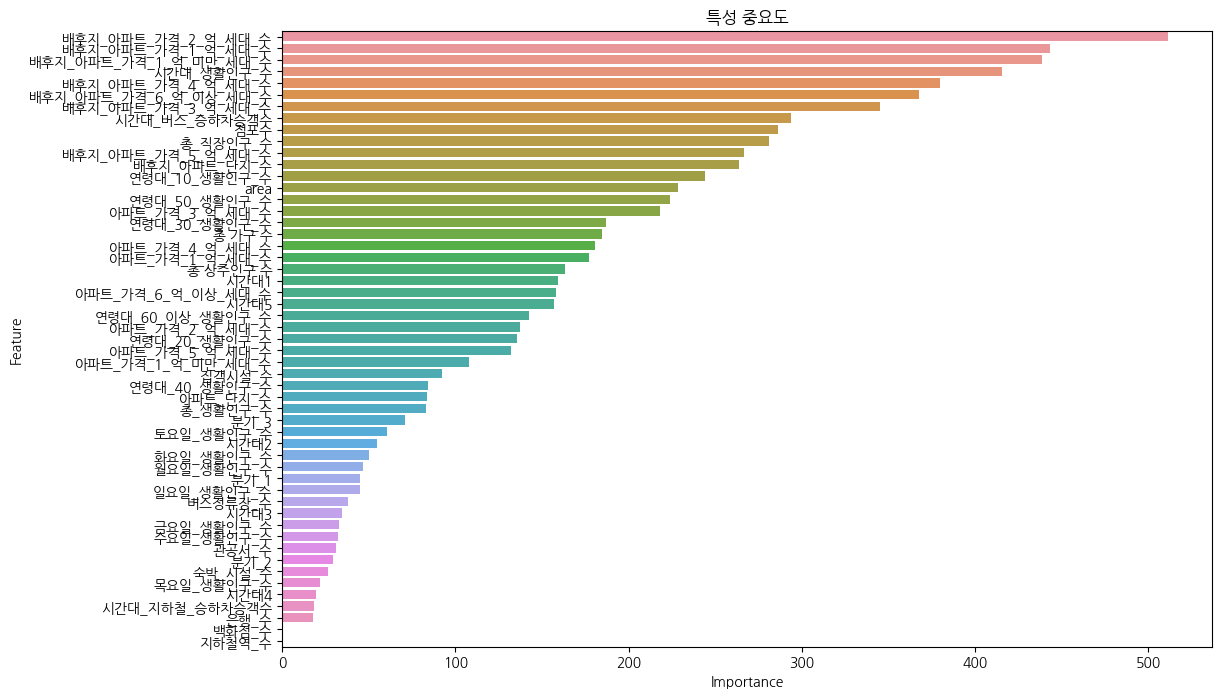

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 2: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}
Fold 5: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}


In [7]:
#k폴드, 라이트gbm 베이스라인 코드

data_base_gol = pd.read_csv('골목상권_데이터230914.csv')

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수','시간대_생활인구_수', 
        '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data_base_gol[features]
y = data_base_gol['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

### 1번. 생활인구 합치기

In [8]:
# 데이터 로드
data = pd.read_csv('data/골목상권외(배후지제거)_230913.csv')

#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['매출', '시간대1', '시간대2',
       '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수',
       '시간대_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']
X = df_gol[features]
y = df_gol['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# feature importance 평균 출력
averate_feature_importance = np.mean(best_params_list, axis = 0)

# 특성 이름
feature_names = X.columns

# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("Best Hyperparameters for K-fold CV:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

NameError: name 'df_gol' is not defined

In [ ]:
# 데이터 로드
data = pd.read_csv('data/골목상권_230914.csv')

X = data[['점포수', '시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 
          '총 상주인구 수', '총 가구 수', '총_직장인구_수', '총_생활인구_수',
       '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수']]
       
y = data['매출']


# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("Best Hyperparameters for K-fold CV:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

In [ ]:
df_gol = pd.read_csv('data/Final/골목상권_230914.csv')

# 월요일부터 금요일까지의 생활인구 수 컬럼 이름
columns_to_sum1 = ['월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수']
columns_to_sum2 = ['토요일_생활인구_수', '일요일_생활인구_수']
# df_gol 데이터프레임에서 해당 컬럼을 더하고 5로 나누어서 평일 생활인구수 컬럼 생성
df_gol['평일_생활인구_평균'] = df_gol[columns_to_sum1].sum(axis=1) / 5
df_gol['주말_생활인구_평균'] = df_gol[columns_to_sum2].sum(axis=1) / 2
df_gol.head()

In [ ]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2',
       '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수',
       '시간대_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수', '평일_생활인구_평균', '주말_생활인구_평균']

X = df_gol[features]
y = df_gol['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    # mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("Best Hyperparameters for K-fold CV:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')